<a href="https://colab.research.google.com/github/carlos840818/entrega_final_data_science/blob/main/TP1/Trabajo_Final_Carlos_Alberto_Gordillo_Varela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Final Carrera Data Science**
## **Alumno: Carlos Alberto Gordillo Varela**

**Sección 1 - Abstract**

This dataset, curated by Gregory Smith through web scraping of vgchartz.com, offers a comprehensive repository of video game-related information. Encompassing a wide array of variables such as game titles, platforms, genres, sales figures, and release dates, the dataset presents a thorough snapshot of the video game industry. The utilization of web scraping techniques by Smith has enabled the aggregation of valuable data, making it a valuable resource for analytical and exploratory research within the realm of video games.

The dataset's richness in information provides researchers and enthusiasts alike with a robust tool for studying trends, patterns, and market dynamics in the video game industry. With meticulous attention to data extraction, Smith ensures the integrity and relevance of the dataset. This compilation process involved overcoming challenges associated with web scraping, contributing to the dataset's uniqueness and potential impact on industry research.

Researchers and analysts can harness this dataset to gain insights into the gaming industry's landscape, fostering a deeper understanding of the factors that influence game sales and popularity. The inclusion of diverse variables allows for nuanced analyses, from examining the performance of specific genres on different platforms to tracking the evolution of sales figures over time. As a valuable repository of video game-related data, this dataset opens avenues for empirical research and data-driven decision-making within the dynamic and ever-evolving field of gaming.

**Resumen:**

Este conjunto de datos, recopilado por Gregory Smith mediante la extracción de datos de vgchartz.com, ofrece un completo repositorio de información relacionada con videojuegos. Abordando una amplia gama de variables como títulos de juegos, plataformas, géneros, cifras de ventas y fechas de lanzamiento, el conjunto de datos presenta una visión integral de la industria de los videojuegos. La utilización de técnicas de extracción de datos web por parte de Smith ha permitido la agregación de datos valiosos, convirtiéndolo en un recurso destacado para la investigación analítica y exploratoria dentro del ámbito de los videojuegos.

La riqueza de información en el conjunto de datos proporciona a investigadores y entusiastas una herramienta sólida para estudiar tendencias, patrones y dinámicas de mercado en la industria de los videojuegos. Con atención meticulosa a la extracción de datos, Smith garantiza la integridad y relevancia del conjunto de datos. Este proceso de compilación implicó superar desafíos asociados con la extracción de datos web, contribuyendo a la singularidad del conjunto de datos y su potencial impacto en la investigación de la industria.

Investigadores y analistas pueden aprovechar este conjunto de datos para obtener perspicacias sobre el panorama de la industria del juego, fomentando una comprensión más profunda de los factores que influyen en las ventas y la popularidad de los juegos. La inclusión de variables diversas permite análisis matizados, desde examinar el rendimiento de géneros específicos en diferentes plataformas hasta rastrear la evolución de las cifras de ventas a lo largo del tiempo. Como un valioso repositorio de datos relacionados con videojuegos, este conjunto de datos abre caminos para la investigación empírica y la toma de decisiones basada en datos dentro de este campo dinámico y en constante evolución.

**Sección 2: Contexto Comercial**

Un grupo de ejecutivos desea invertir una cantidad importante de dinero en la industria de los videojuegos. Para dar luz verde a la ejecución del proyecto, los empresarios desean obtener información confiable sobre la industria, dentro de la información que desean conocer tenemos:

- Región con el mayor número de ventas
- Géneros más vendidos por región
- Editores con mayor número de ventas
- Plataformas (consolas) con más ventas a nivel mundial.

**Problema Comercial - Objetivo**

Crear un modelo que permita conocer cual debe ser el mercado objetivo, el género de videojuego más exitoso y el editor más confiable para que los inversionistas puedan llevar a cabo de forma exitosa su incursión en la industria de los videojuegos.

Nota: Aunque este dataset no es ideal para crear predicciones porque sus características son muy variadas, intenté realizar una simulación de predicción de ventas para aplicar todo lo aprendido durante el curso.

**Contexto analítico**

Los datos residen en un archivo CSV que se bajó de kaggle.com. A lo largo del caso, estará iterando en su modelo inicial muchas veces. Se utilizará el paquete statsmodels de Python para crear y analizar estos modelos lineales.

**Preguntas:**

- ¿Cuál es el género más vendido por región y a nivel global?
- ¿Cuál es el editor con más juegos lanzados?
- ¿Cual es la plataforma con más ventas a nivel global?
- ¿En que género(s), con cual editor(es) deberían los empresarios desarrollar el/los videojuego(s) y en que región(es) deberían realizar el lanzamiento?

**Sección 3: Adquisición de los datos**

Los datos residen en un archivo CSV que se descargó de kaggle.com. A lo largo del caso, estará iterando en su modelo inicial muchas veces. Se utilizará el paquete statsmodels de Python para crear y analizar estos modelos lineales.

#### **Descripción de Columnas**

- Rank: Clasificación del juego según las ventas globales.
- Name: Nombre del juego.
- Platform: Plataforma de lanzamiento del juego.
- Year: Año de lanzamiento del juego.
- Genre: Género del juego.
- Publisher: Editorial del juego.
- NA_Sales: Ventas del juego en la región de América del Norte.
- EU_Sales: Ventas del juego en la región de Europa.
- JP_Sales: Ventas del juego en la región de Japón.
- Other_Sales: Ventas del juego en regiones distintas a las mencionadas anteriormente.
- Global_Sales: Ventas totales del juego a nivel mundial.

In [4]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Modelos de Regresión
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Modelos de Clasificación
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Modelos de Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Métricas
# ==============================================================================
from sklearn.metrics import accuracy_score, confusion_matrix # mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from google.colab import drive
from scipy.stats import pointbiserialr, spearmanr, pearsonr, contingency

In [5]:
# Conectamos con Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Ubicación del archivo
drive_path = "/content/drive/MyDrive/primera_entrega_data_science/vgsales.csv"

In [7]:
# Leer el documento CSV e incluirlo en un DataFrame
df = pd.read_csv(drive_path, delimiter = ',')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# Podemos ver algunas métricas del df
df.describe().round(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [9]:
# Ordeno por la variable tiempo
df = df.sort_values(by='Year')

In [10]:
# Podemos ver la información con .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 6896 to 16493
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
# Veo la cantidad de valores faltantes
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
# Vemos la forma
df.shape

(16598, 11)

In [13]:
# Verificamos valores únicos en la columna 'Year'
df['Year'].unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [14]:
# Verificamos valores únicos en la columna 'Publisher'
df['Publisher'].unique()

array(['Atari', 'Activision', 'Taito', '20th Century Fox Video Games',
       'Mattel Interactive', 'Unknown', 'Tigervision', 'Mystique',
       'Imagic', 'Coleco', 'Parker Bros.', 'Men-A-Vision', 'Data Age',
       'Starpath Corp.', 'ITT Family Games', 'Answer Software', 'Quelle',
       'Universal Gamex', 'Wizard Video Games', 'CBS Electronics',
       'Avalon Interactive', 'Sega', 'Bomb', 'CPG Products', 'Nintendo',
       'Hudson Soft', 'Namco Bandai Games', 'Mycom', 'Capcom',
       'Konami Digital Entertainment', 'Enix Corporation', 'SquareSoft',
       'Maxis', 'HAL Laboratory', 'Palcom', 'Imagineer', 'Tecmo Koei',
       'Banpresto', 'Kemco', 'Angel Studios', 'Culture Brain', 'Epoch',
       'Square', 'BPS', 'Human Entertainment', 'ChunSoft',
       'Arena Entertainment', 'Takara', 'Video System', 'Electronic Arts',
       'id Software', 'Virgin Interactive', 'Ocean',
       'New World Computing', 'SNK', 'Misawa', 'Hect', 'T&E Soft',
       'Acclaim Entertainment', 'Coconuts Ja

In [15]:
# Generamos una copia del DataFrame
df_no_nulls = df.copy()

In [16]:
# Eliminamos los valores faltantes de la columna 'Year'
df_no_nulls.dropna(subset=['Year'], inplace=True)
df_no_nulls.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [17]:
# Eliminamos los valores faltantes de la columna 'Publisher'
df_no_nulls.dropna(subset=['Publisher'], inplace=True)
df_no_nulls.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [18]:
# Cambiamos el nombre del DataFrame para facilitar su manipulación y se analizan los duplicados
df=df_no_nulls.drop_duplicates()
df.shape

(16291, 11)

## ¿Cuál es el género con más ventas a nivel global?

In [19]:
# Generamos un DataFrame 'genre' que relaciona las ventas globales por género
genre = df[['Genre','Global_Sales']].groupby(by=['Genre']).sum()
genre.head()

,Global_Sales
Genre,
Action,1722.84
Adventure,234.59
Fighting,444.05
Misc,789.87
Platform,829.13


Text(0.5, 0, 'Género')

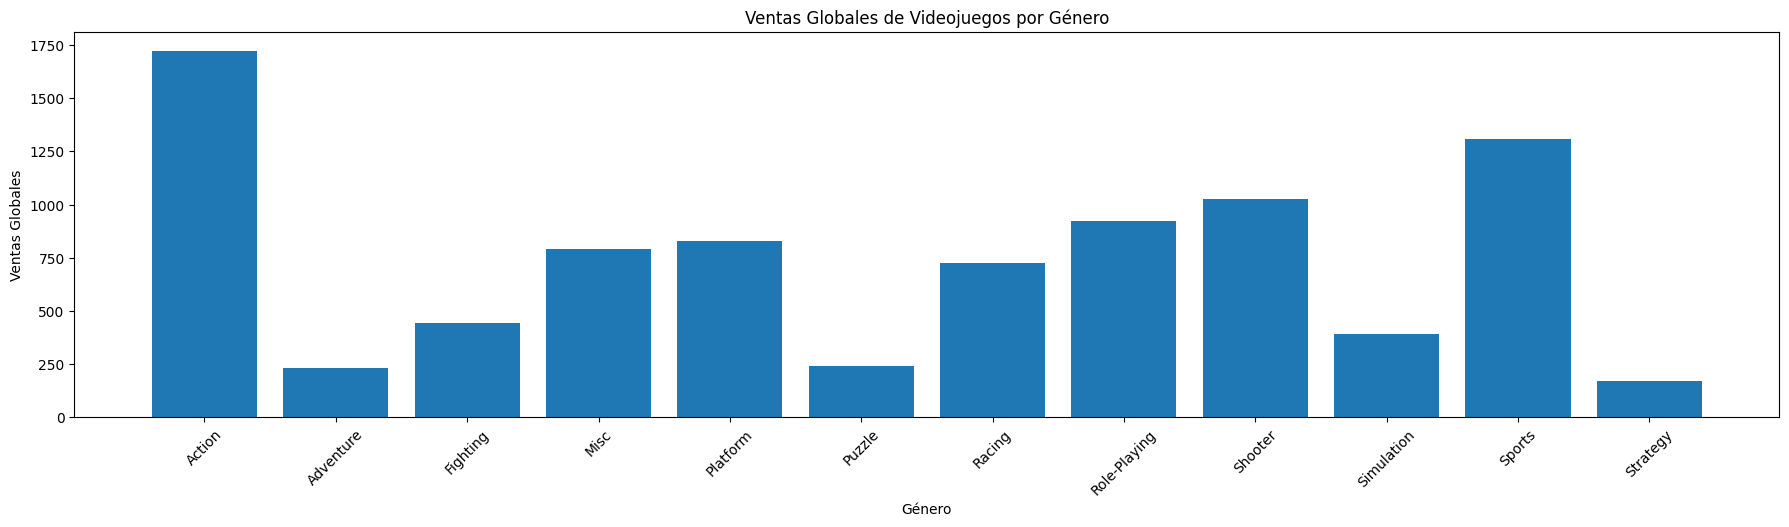

In [20]:
# Genereamos el gráfico
fig, ax = plt.subplots(figsize=(22,5))
plt.xticks(rotation=45)
ax.bar(genre.index,genre['Global_Sales'])
ax.set_title('Ventas Globales de Videojuegos por Género')
ax.set_ylabel('Ventas Globales')
ax.set_xlabel('Género')

#### Respuesta: A nivel global en el género de acción es el más vendido.

## ¿Cuál es el género con más ventas en Norte América?

In [21]:
# Generamos un DataFrame 'genre' que relaciona las ventas en Norte América por género
genre = df[['Genre','NA_Sales']].groupby(by=['Genre']).sum()
genre.head()

,NA_Sales
Genre,
Action,861.77
Adventure,101.93
Fighting,220.74
Misc,396.92
Platform,445.99


Text(0.5, 0, 'Género')

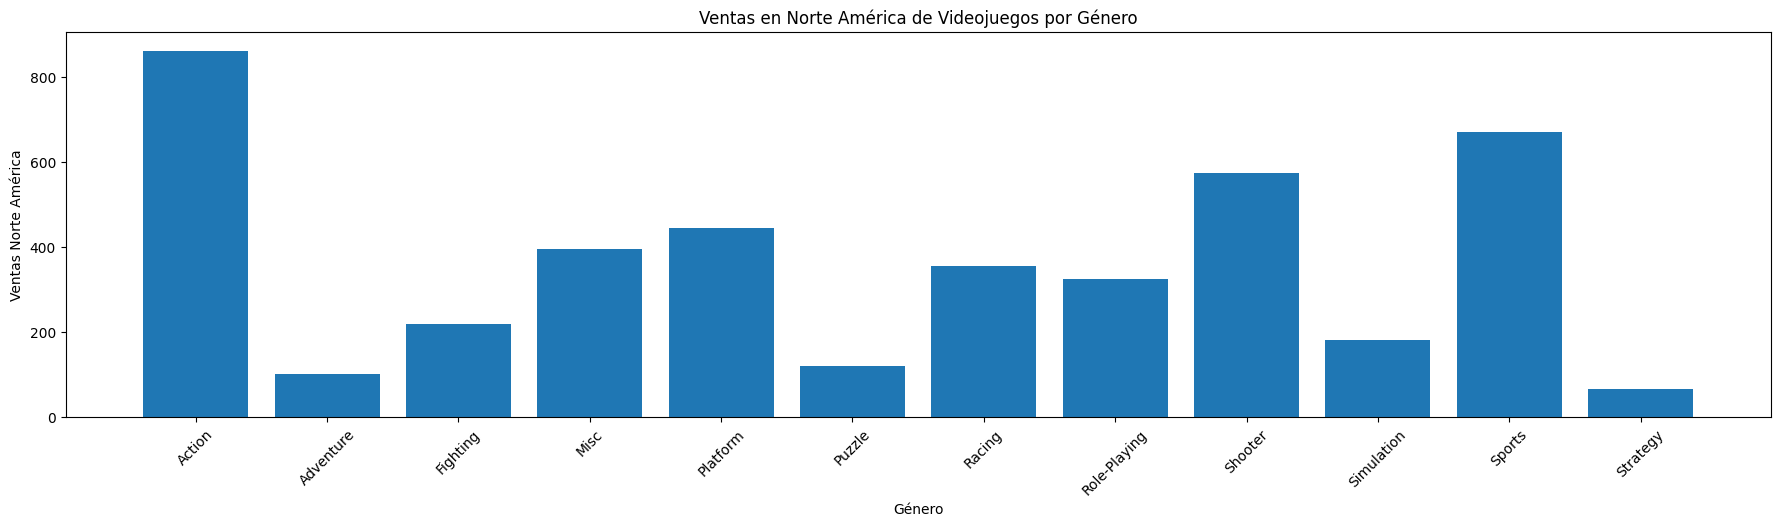

In [22]:
# Generamos el gráfico
fig, ax = plt.subplots(figsize=(22,5))
plt.xticks(rotation=45)
ax.bar(genre.index,genre['NA_Sales'])
ax.set_title('Ventas en Norte América de Videojuegos por Género')
ax.set_ylabel('Ventas Norte América')
ax.set_xlabel('Género')

#### Respuesta: En América del Norte el género de acción también es el más vendido.

## ¿Cuál es el género con más ventas en Europa?

In [23]:
# Generamos un DataFrame 'genre' que relaciona las ventas en Europa por género
genre = df[['Genre','EU_Sales']].groupby(by=['Genre']).sum()
genre.head()

,EU_Sales
Genre,
Action,516.48
Adventure,63.74
Fighting,100.00
Misc,211.77
Platform,200.65


Text(0.5, 0, 'Género')

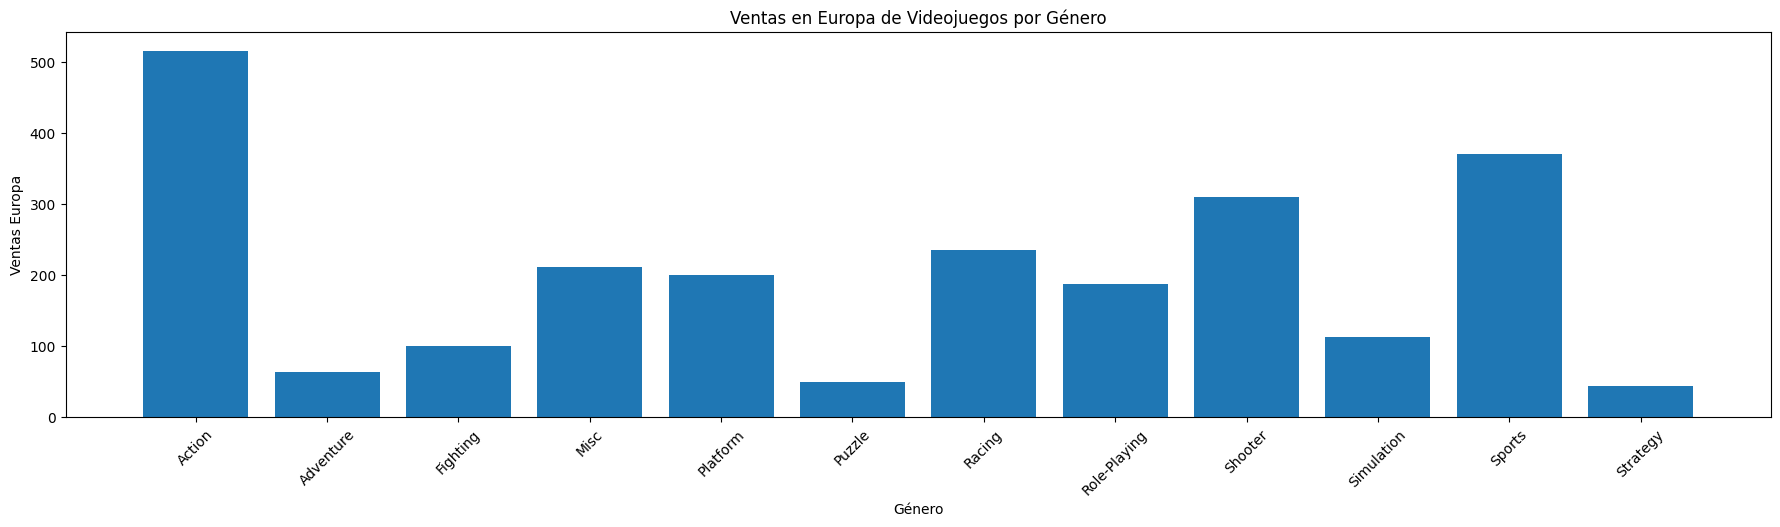

In [24]:
# Generamos el gráfico
fig, ax = plt.subplots(figsize=(22,5))
plt.xticks(rotation=45)
ax.bar(genre.index,genre['EU_Sales'])
ax.set_title('Ventas en Europa de Videojuegos por Género')
ax.set_ylabel('Ventas Europa')
ax.set_xlabel('Género')

#### Respuesta: En Europa al igual que en Norte América y en las ventas globales, el género de acción es el más vendido.

## ¿Cuál es el género con más ventas en Japón?

In [25]:
# Generamos un DataFrame 'genre' que relaciona las ventas en Japón por género
genre = df[['Genre','JP_Sales']].groupby(by=['Genre']).sum()
genre.head()

,JP_Sales
Genre,
Action,158.65
Adventure,51.99
Fighting,87.15
Misc,106.67
Platform,130.65


Text(0.5, 0, 'Género')

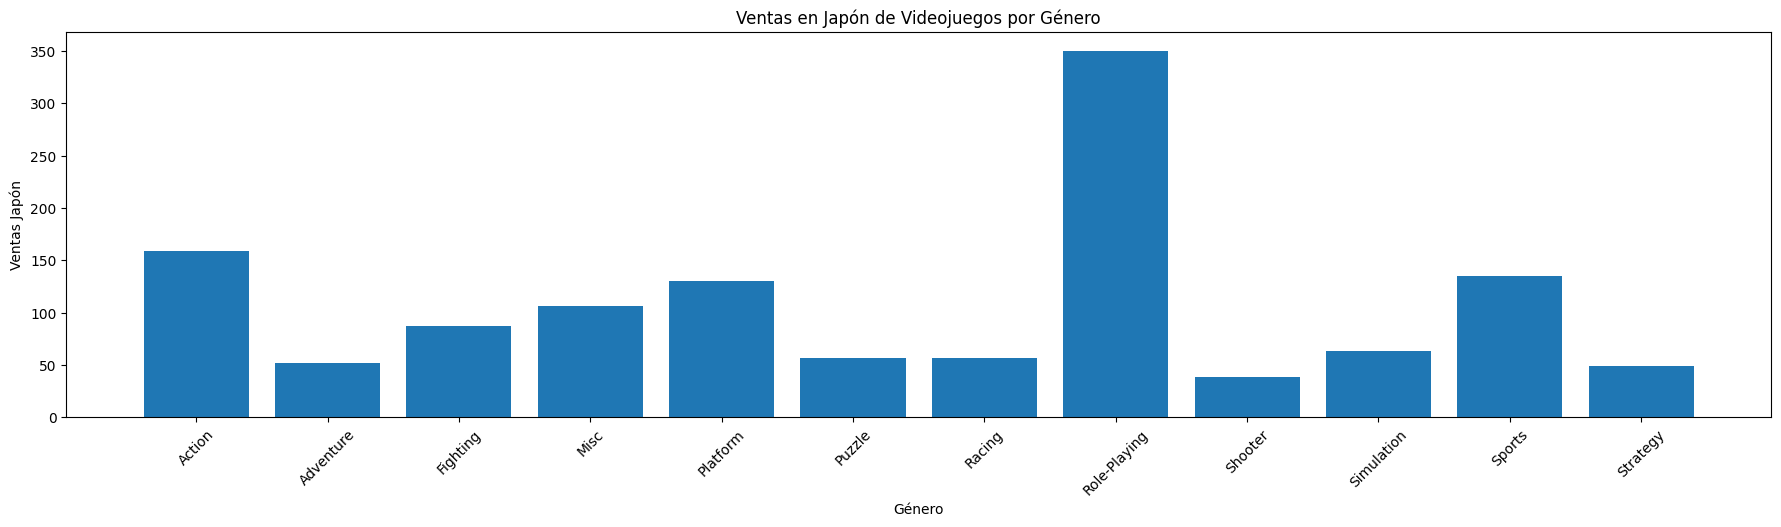

In [26]:
# Generamos el gráfico
fig, ax = plt.subplots(figsize=(22,5))
plt.xticks(rotation=45)
ax.bar(genre.index,genre['JP_Sales'])
ax.set_title('Ventas en Japón de Videojuegos por Género')
ax.set_ylabel('Ventas Japón')
ax.set_xlabel('Género')

#### Respuesta: En Japón, el género de rol es el más vendido con una gran diferencia.

## Géneros más vendidos a nivel global para las consolas más populares

In [27]:
# Incluimos la columna 'Platform'
platform = df[['Platform','Genre','Global_Sales']].groupby(by=['Platform','Genre']).sum()
##platform.head()

## ¿Cuál es el género más vendido para la consola Play Station 3?

In [28]:
# Filtramos por la consola Play Station 3
ps3=platform.loc['PS3']
ps3

,Global_Sales
Genre,
Action,304.02
Adventure,22.87
Fighting,51.70
Misc,45.91
Platform,29.85
Puzzle,0.46
Racing,73.10
Role-Playing,75.24
Shooter,195.80


Text(0.5, 0, 'Género')

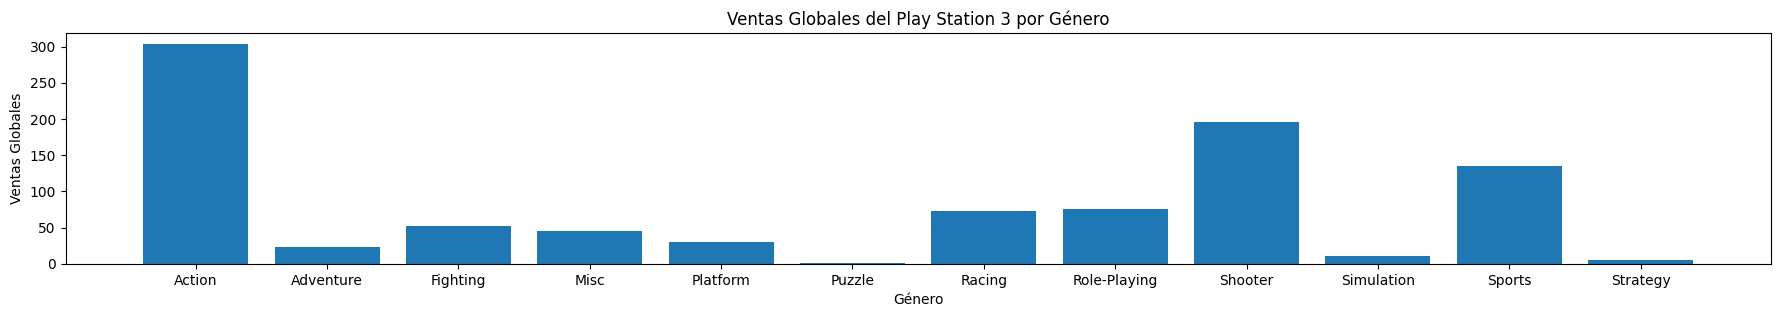

In [29]:
# Generamos el gráfico Ventas globales del PS3 por género
fig1, ax = plt.subplots(figsize=(22,3))
ax.bar(ps3.index,ps3['Global_Sales'])
ax.set_title('Ventas Globales del Play Station 3 por Género')
ax.set_ylabel('Ventas Globales')
ax.set_xlabel('Género')

#### Respuesta: El género de acción fue el más vendido para la consolta PS3.

## ¿Cuál es el género más vendido para la legendaria consola Nintendo?

In [30]:
# Filtramos por la clásica consola Nintendo
nes=platform.loc['NES']
nes

,Global_Sales
Genre,
Action,28.75
Adventure,4.38
Fighting,6.54
Misc,3.59
Platform,95.78
Puzzle,21.00
Racing,9.78
Role-Playing,18.78
Shooter,35.62


Text(0.5, 0, 'Género')

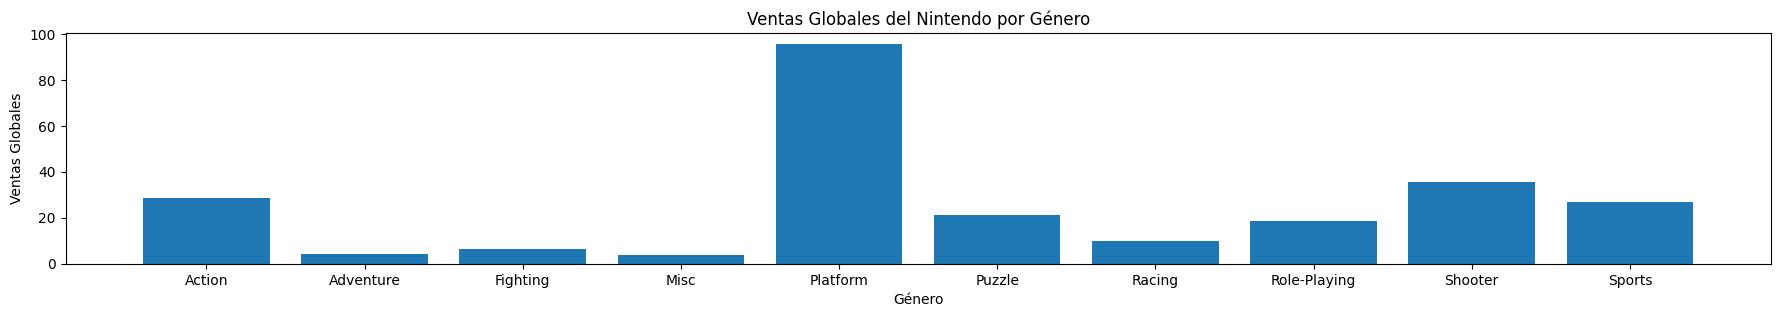

In [31]:
# Generamos el gráfico Ventas globales del NES por género
fig1, ax = plt.subplots(figsize=(22,3))
ax.bar(nes.index,nes['Global_Sales'])
ax.set_title('Ventas Globales del Nintendo por Género')
ax.set_ylabel('Ventas Globales')
ax.set_xlabel('Género')

#### Respuesta: El género de plataforma fue el género más vendido para la consolta Nintendo (juegos icónicos como Super Mario Bross, Contra, Donkey Kong) son algunos de los más famosos.

## ¿Cuál es el género más vendido para la consola Play Station 2?

In [32]:
# Filtramos por Play Station 2
ps2=platform.loc['PS2']
ps2

,Global_Sales
Genre,
Action,272.43
Adventure,21.16
Fighting,89.19
Misc,98.69
Platform,72.11
Puzzle,5.90
Racing,154.21
Role-Playing,91.55
Shooter,108.28


Text(0.5, 0, 'Género')

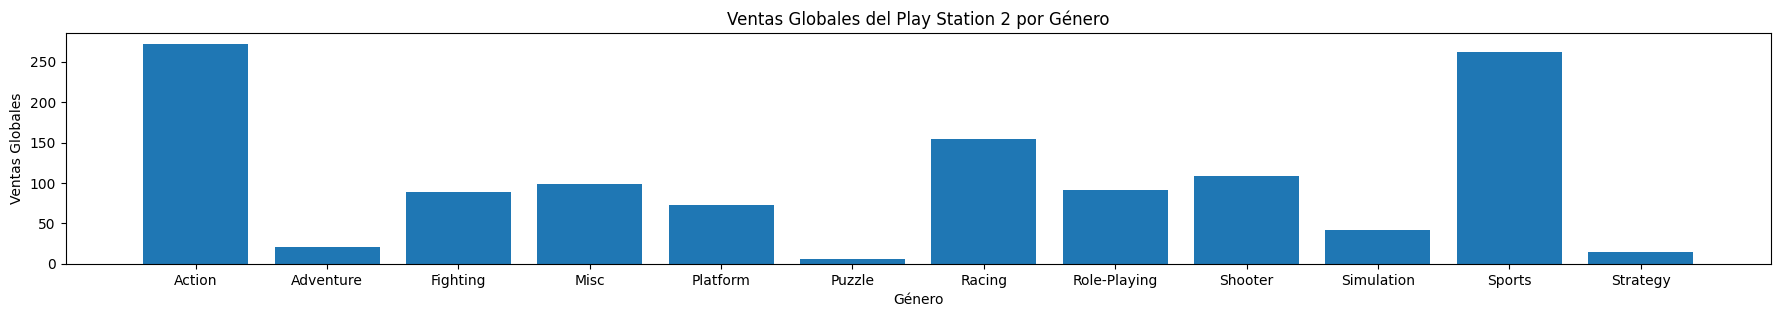

In [33]:
# Generamos el gráfico Ventas globales del PS2 por género
fig1, ax = plt.subplots(figsize=(22,3))
ax.bar(ps2.index,ps2['Global_Sales'])
ax.set_title('Ventas Globales del Play Station 2 por Género')
ax.set_ylabel('Ventas Globales')
ax.set_xlabel('Género')

#### Respuesta: El género de acción, seguido de cerca por el género de deportes, son los más vendidos para la consola Play Station 2

## ¿Cuál es el género más vendido para la consola XBOX 360?

In [34]:
# Filtramos para la Xbox 360 de Microsoft
x360=platform.loc['X360']
x360

,Global_Sales
Genre,
Action,239.67
Adventure,15.23
Fighting,37.64
Misc,89.33
Platform,11.39
Puzzle,0.71
Racing,65.13
Role-Playing,71.97
Shooter,277.23


Text(0.5, 0, 'Género')

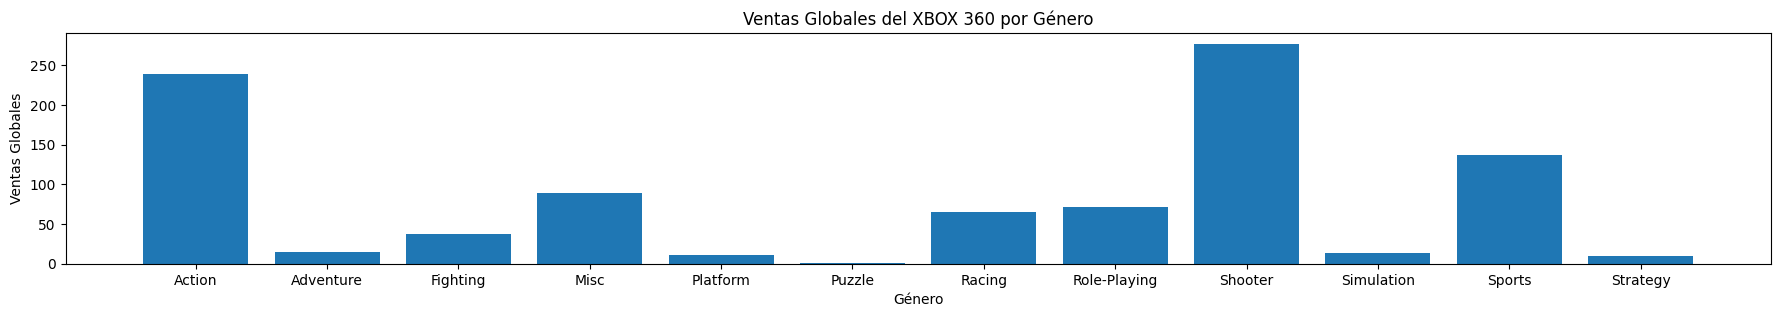

In [35]:
# Generamos el gráfico Ventas globales del XBox 360 de Microsoft por género
fig1, ax = plt.subplots(figsize=(22,3))
ax.bar(x360.index,x360['Global_Sales'])
ax.set_title('Ventas Globales del XBOX 360 por Género')
ax.set_ylabel('Ventas Globales')
ax.set_xlabel('Género')

#### Respuesta: El género de disparos es el más vendido en la XBOX 360

## Comparativo de ventas por Región

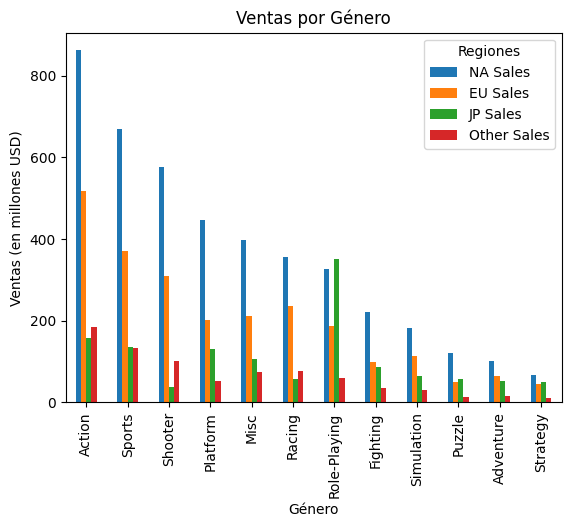

In [36]:
# Filtro las ventas por género en cada región
sales_by_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_by_genre.columns = sales_by_genre.columns.str.replace('_', ' ')
sorted_sales_by_genre = sales_by_genre.sort_values(by='NA Sales', ascending=False)
sorted_sales_by_genre.plot(kind='bar')

#Añade un título
plt.title('Ventas por Género')

#Añade etiquetas
plt.xlabel('Género')
plt.ylabel('Ventas (en millones USD)')

#Añade leyenda
plt.legend(title='Regiones');

# Muestra el gráfico
plt.show()

#### Observación: Podemos apreciar que en todos los géneros, salvo en el género de juegos de rol, el mercado norteamericano es el más grande a nivel mundial. Solo en el género de juegos de rol es superado por el mercado japonés.

## Ventas Anuales por Región

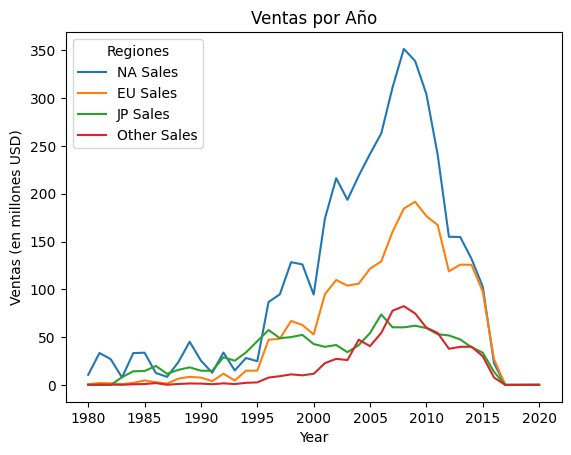

In [37]:
# filtra ventas por año en cada región
sales_by_year = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_by_year.columns = sales_by_year.columns.str.replace('_', ' ')
sales_by_year.plot(kind='line')

# Añade un título
plt.title('Ventas por Año')

# Añade etiqueta
plt.ylabel('Ventas (en millones USD)')

# Añade leyenda
plt.legend(title='Regiones');

# Muestra el gráfico
plt.show()

#### Observación: Desde la década de 1980 y hasta el año 1995, los mercados Japonés y Norteamericano estuvieron mano a mano en ventas. Sin embargo, desde el año 1996 el mercado Norteamericano se convirtió en la joya de la corona para la venta de videojuegos, teniendo su pico más alto en el año 2006.

## Cantidad de juegos producidos para cada género

In [38]:
# Filtramos para conocer la cantidad de videojuegos desarrollados por género
df['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

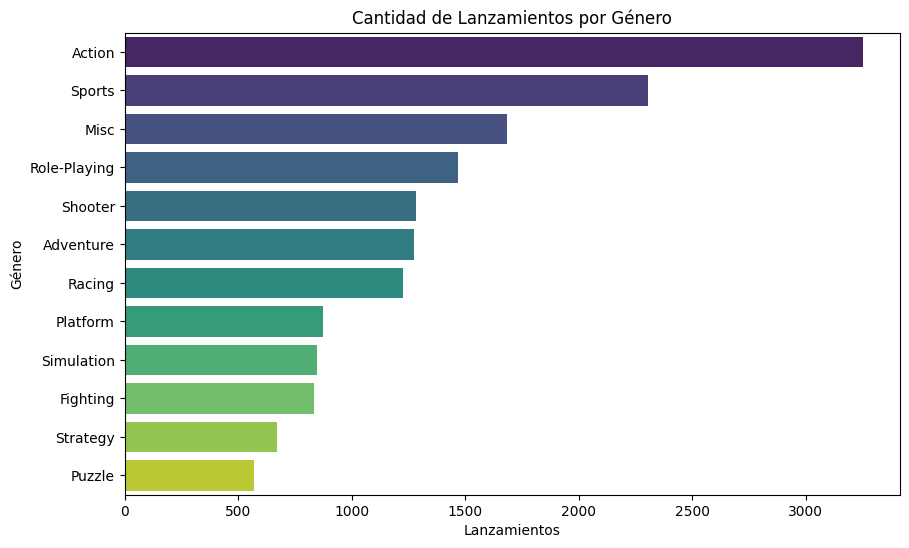

In [39]:
# Generamos el gráfico
genre_counts = pd.Series({
    'Action': 3251,
    'Sports': 2304,
    'Misc': 1686,
    'Role-Playing': 1470,
    'Shooter': 1282,
    'Adventure': 1274,
    'Racing': 1225,
    'Platform': 875,
    'Simulation': 848,
    'Fighting': 836,
    'Strategy': 670,
    'Puzzle': 570
})

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('Cantidad de Lanzamientos por Género')
plt.xlabel('Lanzamientos')
plt.ylabel('Género')
plt.show()

#### Observación: Podemos observar que para el género de acción se han producido 3251 juegos, casi 1000 más que el segundo en la lista. Esto puede dar significado del porque el género de acción es el más vendido a nivel mundial, pues es el género con mayor oferta de juegos.

## Cantidad de juegos producidos para cada consola

In [40]:
# Filtramos para conocer la cantidad de juegos desarrollados para cada consola
df['Platform'].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

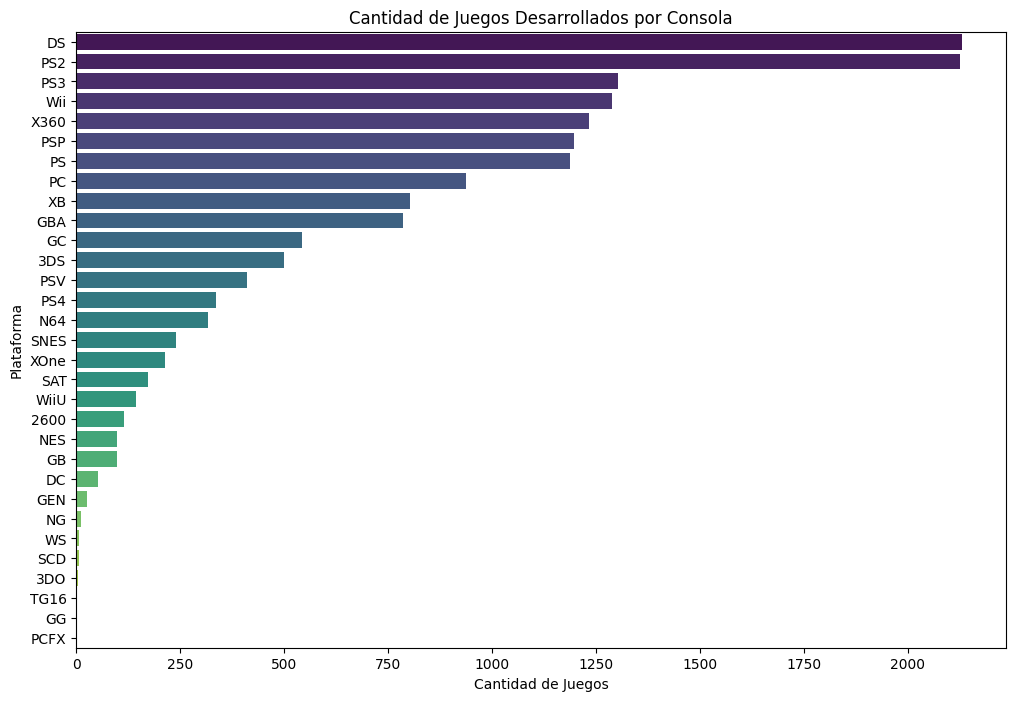

In [41]:
# Generamos el gráfico
platform_counts = pd.Series({
    'DS': 2131,
    'PS2': 2127,
    'PS3': 1304,
    'Wii': 1290,
    'X360': 1234,
    'PSP': 1197,
    'PS': 1189,
    'PC': 938,
    'XB': 803,
    'GBA': 786,
    'GC': 542,
    '3DS': 499,
    'PSV': 410,
    'PS4': 336,
    'N64': 316,
    'SNES': 239,
    'XOne': 213,
    'SAT': 173,
    'WiiU': 143,
    '2600': 116,
    'NES': 98,
    'GB': 97,
    'DC': 52,
    'GEN': 27,
    'NG': 12,
    'WS': 6,
    'SCD': 6,
    '3DO': 3,
    'TG16': 2,
    'GG': 1,
    'PCFX': 1
})

# Crear un gráfico de barras para plataformas
plt.figure(figsize=(12, 8))
sns.barplot(x=platform_counts.values, y=platform_counts.index, hue=platform_counts.index, palette='viridis', legend=False)
plt.title('Cantidad de Juegos Desarrollados por Consola')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Plataforma')
plt.show()

#### Observación: Podemos evidenciar que las consolas PS2 y DS son las que más cantidad de juegos tienen disponibles

## Cantidad de juegos desarrollados por cada editor

In [42]:
# Filtramos para conocer la cantidad de juegos desarrollados por cada editor
df['Publisher'].value_counts()[0:20]

Publisher
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Name: count, dtype: int64

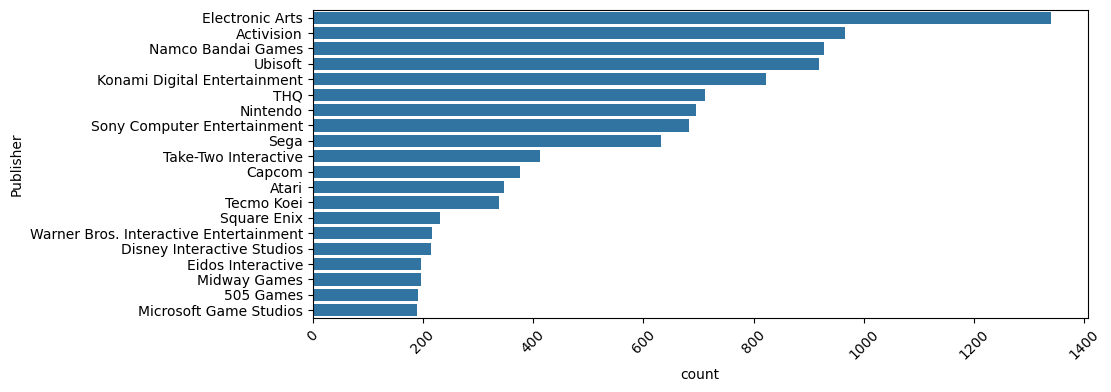

In [43]:
# Generamos el gráfico para los 20 primeros
f = plt.figure(figsize=(10, 4))

top_publishers = df['Publisher'].value_counts().head(20)
sns.countplot(y='Publisher', data=df[df['Publisher'].isin(top_publishers.index)], order=top_publishers.index)

plt.xticks(rotation=45)
plt.show()

#### Observación: Hicimos un TOP 20 y podemos observar que el editor que más juegos produjo fue Electronic Arts

## Distribución de las Ventas por Región

<ipython-input-44-22952291f38b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=sales_data, palette='viridis')


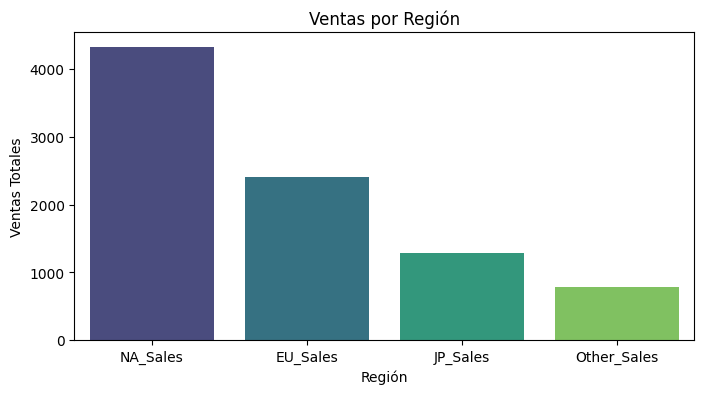

In [44]:
# Preparar los datos para el gráfico
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_data = df[regions].sum().reset_index()
sales_data.columns = ['Region', 'Sales']

# Gráfico de barras de ventas por región
plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='Sales', data=sales_data, palette='viridis')
plt.title('Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')
plt.show()

#### Observación: como ya lo habiamos podido anticipar, el mercado Norteamericano es sin duda el más grande a nivel mundial, con ventas que superan los 4000 millones de dólares.

## Ventas Globales por Género

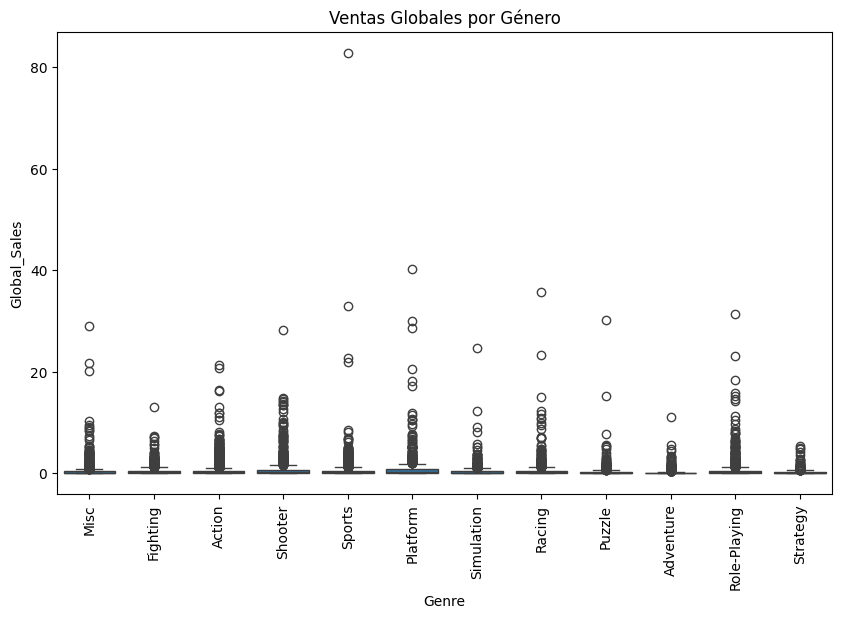

In [45]:
# Ventas globales por género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Ventas Globales por Género')
plt.xticks(rotation=90)
plt.show()

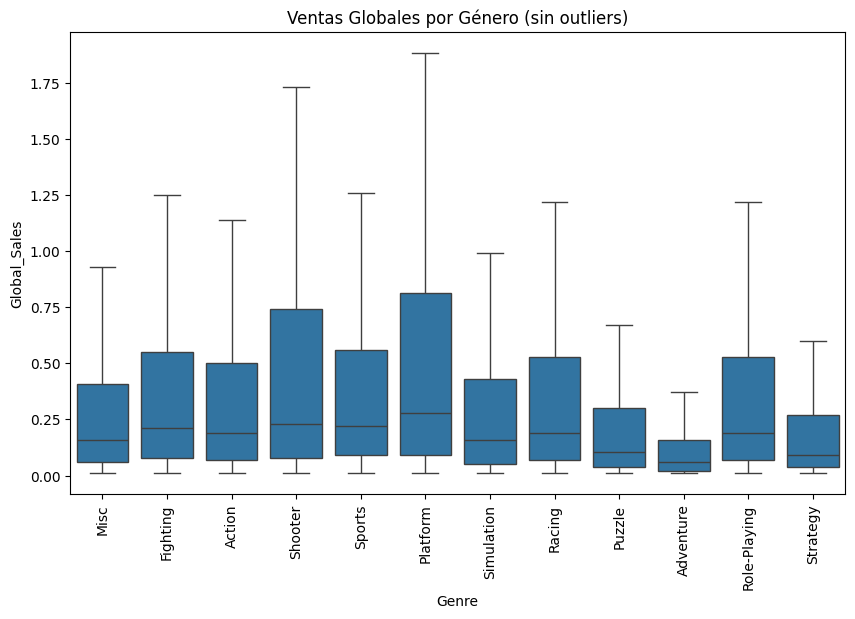

In [46]:
# Ventas globales por género sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df, showfliers=False)
plt.title('Ventas Globales por Género (sin outliers)')
plt.xticks(rotation=90)
plt.show()

#### Observación: Podemos apreciar que hubo algunos juegos por cada género, que tuvieron muchísmas ventas y quedaban por fuera de la mediana de los datos.

## Matriz de Correlación

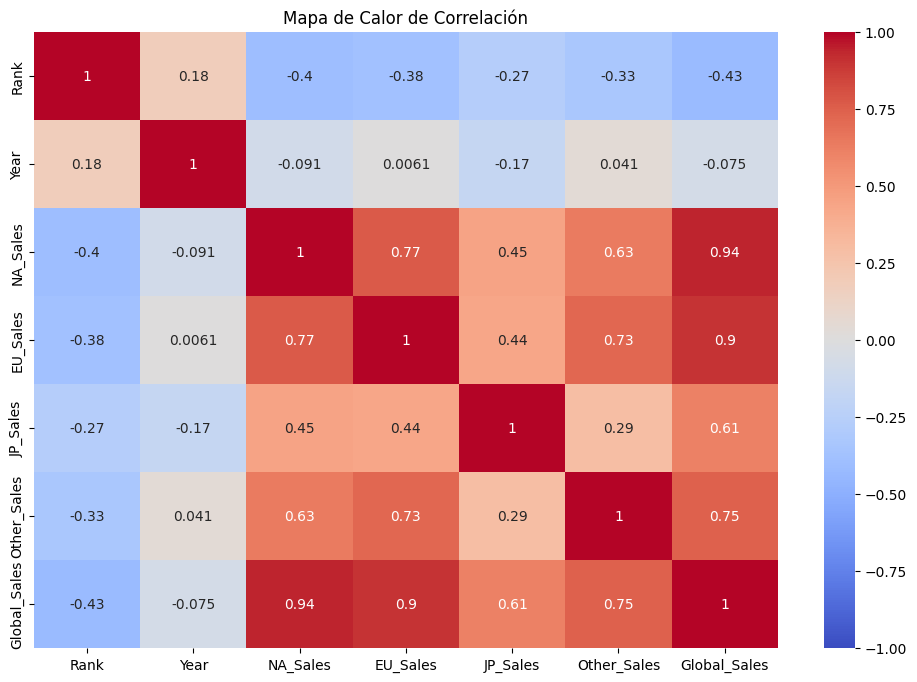

In [47]:
# Correlación entre variables numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

#### Observación: las ventas por región están altamente correlacionadas con las ventas globales.

## Preparación y Entrenamiento de los Datos

## Predicción de los géneros que van a tener más ventas a futuro, Predicción de los Editores más exitosos en el futuro y Predicción de las regiones con más ventas a futuro

In [48]:
# Nos aseguramos de que las ventas globales sean positivas
df = df[df['Global_Sales'] > 0]

# Llenar los valores nulos en la columna 'Publisher'
df['Publisher'].fillna('Unknown', inplace=True)

# Separar características y etiquetas
X = df.drop(columns=['Genre', 'Publisher', 'Global_Sales'])
y_genre = df['Genre']
y_publisher = df['Publisher']
y_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1)

# Convertir etiquetas a valores numéricos
label_encoder_genre = LabelEncoder()
label_encoder_publisher = LabelEncoder()
label_encoder_region = LabelEncoder()

y_genre = label_encoder_genre.fit_transform(y_genre)
y_publisher = label_encoder_publisher.fit_transform(y_publisher)
y_region = label_encoder_region.fit_transform(y_region)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_genre, y_test_genre = train_test_split(X, y_genre, test_size=0.2, random_state=42)
_, _, y_train_publisher, y_test_publisher = train_test_split(X, y_publisher, test_size=0.2, random_state=42)
_, _, y_train_region, y_test_region = train_test_split(X, y_region, test_size=0.2, random_state=42)

# Preprocesamiento
numeric_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
categorical_features = ['Platform', 'Year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Función para entrenar y evaluar modelos
def train_and_evaluate(X_train, X_test, y_train, y_test, target_names, label_encoder, model_name):
    y_preds = {}
    for name, model in models.items():
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_preds[name] = y_pred  # Guardar las predicciones

        print(f'{model_name} - {name} - Accuracy: {accuracy_score(y_test, y_pred)}')

        # Identificar las clases presentes en y_test y y_pred
        labels_present = sorted(list(set(y_test) | set(y_pred)))

        # Filtrar los nombres de las clases para aquellas presentes en los datos
        filtered_target_names = [target_names[label] for label in labels_present]

        print(classification_report(y_test, y_pred, labels=labels_present, target_names=filtered_target_names, zero_division=0))

    return y_preds

# Entrenar y evaluar los modelos para predecir el género
print("Predicción de Género")
y_preds_genre = train_and_evaluate(X_train, X_test, y_train_genre, y_test_genre, label_encoder_genre.classes_, label_encoder_genre, "Genre")

# Entrenar y evaluar los modelos para predecir el editor
print("\nPredicción de Editor")
y_preds_publisher = train_and_evaluate(X_train, X_test, y_train_publisher, y_test_publisher, label_encoder_publisher.classes_, label_encoder_publisher, "Publisher")

# Entrenar y evaluar los modelos para predecir la región líder en ventas
print("\nPredicción de Región Líder en Ventas")
y_preds_region = train_and_evaluate(X_train, X_test, y_train_region, y_test_region, label_encoder_region.classes_, label_encoder_region, "Region")


Predicción de Género
Genre - Logistic Regression - Accuracy: 0.24455354403191162
              precision    recall  f1-score   support

      Action       0.28      0.60      0.39       665
   Adventure       0.30      0.21      0.25       277
    Fighting       0.27      0.04      0.07       158
        Misc       0.21      0.27      0.23       341
    Platform       0.20      0.07      0.10       162
      Puzzle       0.20      0.02      0.03       112
      Racing       0.27      0.01      0.02       265
Role-Playing       0.26      0.15      0.19       264
     Shooter       0.14      0.04      0.06       262
  Simulation       0.14      0.01      0.01       163
      Sports       0.20      0.32      0.25       467
    Strategy       0.17      0.20      0.18       123

    accuracy                           0.24      3259
   macro avg       0.22      0.16      0.15      3259
weighted avg       0.23      0.24      0.20      3259

Genre - Decision Tree - Accuracy: 0.2095734888002454

## Gráficos de las Predicciones

<ipython-input-49-234fb815effc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_labels, y=genre_counts.values, palette='viridis')


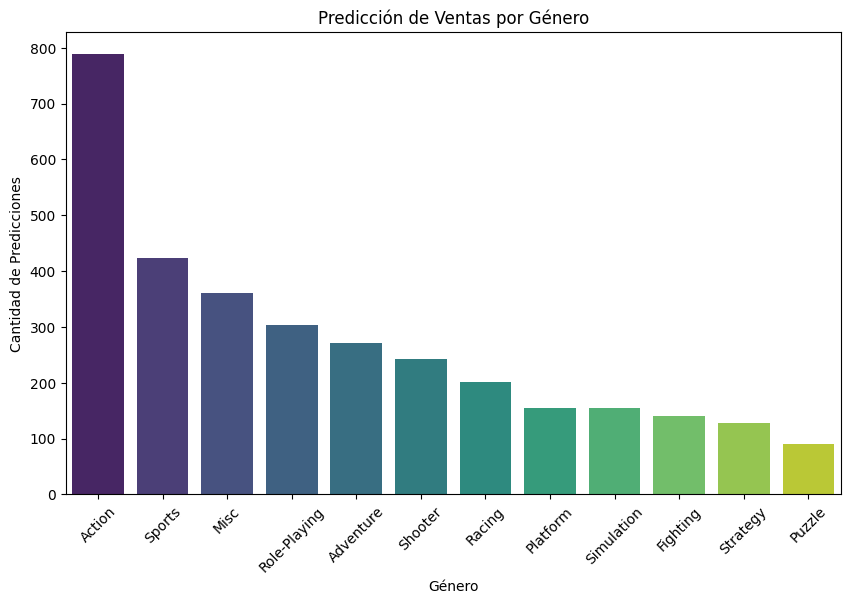

<ipython-input-49-234fb815effc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_labels, y=publisher_counts.values, palette='viridis')


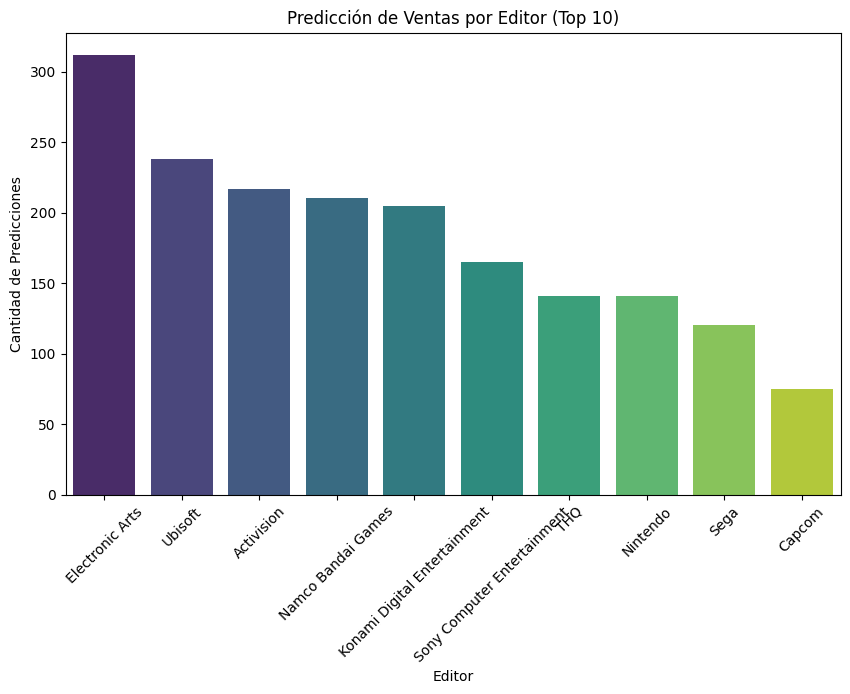

<ipython-input-49-234fb815effc>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_labels, y=region_counts.values, palette='viridis')


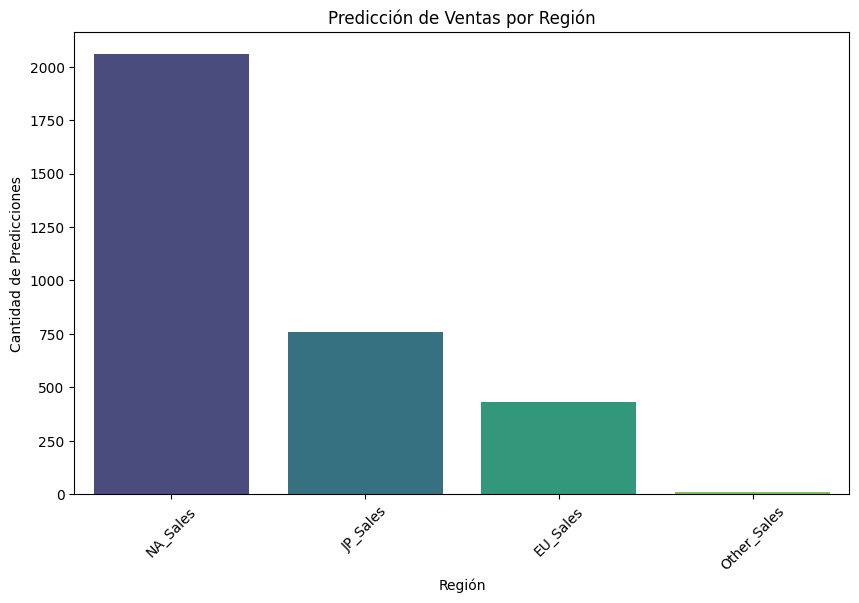

In [49]:
# Elegir un modelo para cada categoría para visualizar los resultados
chosen_model_genre = 'Random Forest'
chosen_model_publisher = 'Random Forest'
chosen_model_region = 'Random Forest'

# Predicciones de género
genre_counts = pd.Series(y_preds_genre[chosen_model_genre]).value_counts().sort_values(ascending=False)
genre_labels = label_encoder_genre.inverse_transform(genre_counts.index)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_labels, y=genre_counts.values, palette='viridis')
plt.title('Predicción de Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Predicciones')
plt.xticks(rotation=45)
plt.show()

# Predicciones de editor - Top 10
publisher_counts = pd.Series(y_preds_publisher[chosen_model_publisher]).value_counts().sort_values(ascending=False).head(10)
publisher_labels = label_encoder_publisher.inverse_transform(publisher_counts.index)
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_labels, y=publisher_counts.values, palette='viridis')
plt.title('Predicción de Ventas por Editor (Top 10)')
plt.xlabel('Editor')
plt.ylabel('Cantidad de Predicciones')
plt.xticks(rotation=45)
plt.show()

# Predicciones de región
region_counts = pd.Series(y_preds_region[chosen_model_region]).value_counts().sort_values(ascending=False)
region_labels = label_encoder_region.inverse_transform(region_counts.index)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_labels, y=region_counts.values, palette='viridis')
plt.title('Predicción de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Predicciones')
plt.xticks(rotation=45)
plt.show()

## Resultados de las Predicciones

-  Predicción de Género más vendido a futuro: En el futuro cercano, el género de acción seguirá liderando el mercado, seguido por el género deportivo.

- Predicción de Editores con más juegos creados a futuro: Todo indica que Electronic Arts seguirá siendo el editor lider a nivel mundial en el desarrollo de videojuegos.

- Predicción de Ventas por regiones a futuro: El mercado norteamericano seguirá siendo el lider en ventas. La gran sorpresa es que Japón sobrepasará a Europa en el segundo lugar.

## Análisis de Hiperparámetros

In [50]:
# Parámetros de hiperparámetros para los modelos
param_grid = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'model__max_depth': [None, 10, 20, 30, 40, 50],
        'model__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30, 40, 50],
        'model__min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    }
}

# Aplicar GridSearchCV
def apply_grid_search_cv(X, y, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', models[model_name])
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid[model_name],
                               scoring='accuracy', n_jobs=-1, cv=5, verbose=2)
    grid_search.fit(X, y)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")

# Aplicar RandomizedSearchCV
def apply_randomized_search_cv(X, y, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', models[model_name])
    ])

    randomized_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid[model_name],
                                           n_iter=20, scoring='accuracy', n_jobs=-1, cv=5, verbose=2, random_state=42)
    randomized_search.fit(X, y)

    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {randomized_search.best_score_}")

# Aplicar validación cruzada y búsqueda de hiperparámetros
for model_name in models.keys():
    print(f"Grid Search for {model_name}")
    apply_grid_search_cv(X_train, y_train_genre, model_name)

    print(f"\nRandomized Search for {model_name}")
    apply_randomized_search_cv(X_train, y_train_genre, model_name)

    print("\n" + "="*50 + "\n")


Grid Search for Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'model__C': 0.1, 'model__solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.2414830077002085

Randomized Search for Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'model__solver': 'lbfgs', 'model__C': 0.1}
Best cross-validation score for Logistic Regression: 0.2414830077002085


Grid Search for Decision Tree
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Decision Tree: {'model__max_depth': 10, 'model__min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.2530701479369111

Randomized Search for Decision Tree
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Decision Tree: {'model__min_samples_split': 10, 'model__max_depth': 10}
Best cross-validation score for Decision Tree: 0.25291668543366186


Grid Search for Random Forest
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best cross-validation score for Random Forest: 0.2728676351319327

Randomized Search for Random Forest
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Random Forest: {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__max_depth': 10}
Best cross-validation score for Random Forest: 0.27279094803794374


Grid Search for K-Nearest Neighbors
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for K-Nearest Neighbors: {'model__n_neighbors': 9, 'model__weights': 'uniform'}
Best cross-validation score for K-Nearest Neighbors: 0.23519075068275064

Randomi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for K-Nearest Neighbors: {'model__weights': 'uniform', 'model__n_neighbors': 9}
Best cross-validation score for K-Nearest Neighbors: 0.23519075068275064




## **Análisis del Resultado de Optimización de Hiperparámetros**


1. **Regresión Logística**

Mejores parámetros (Grid Search y Randomized Search): {'model__C': 0.1, 'model__solver': 'lbfgs'}
Mejor puntuación de validación cruzada: 0.2415
Interpretación: La regresión logística mostró una ligera mejora en la precisión cuando se utilizó la regularización C=0.1 y el solver lbfgs. Sin embargo, la precisión sigue siendo modesta, indicando que este modelo podría no ser el mejor para este conjunto de datos.

2. **Árbol de Decisión**

Mejores parámetros (Grid Search y Randomized Search): {'model__max_depth': 10, 'model__min_samples_split': 10}
Mejor puntuación de validación cruzada: 0.2531
Interpretación: La profundidad máxima de 10 y el mínimo de muestras para dividir un nodo de 10 mejoraron ligeramente el rendimiento del Árbol de Decisión. Este modelo se benefició de la limitación de la profundidad del árbol para evitar el sobreajuste.

3. **Bosque Aleatorio**

Mejores parámetros (Grid Search y Randomized Search): {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Mejor puntuación de validación cruzada: 0.2729
Interpretación: El Bosque Aleatorio mostró el mejor desempeño entre los modelos evaluados, con una precisión de validación cruzada de 0.2729. Este modelo se benefició de tener una mayor cantidad de árboles (200) y de limitar la profundidad máxima a 10.

4. **K-Nearest Neighbors**

Mejores parámetros (Grid Search y Randomized Search): {'model__n_neighbors': 9, 'model__weights': 'uniform'}
Mejor puntuación de validación cruzada: 0.2352

Interpretación: El modelo K-Nearest Neighbors presentó una ligera mejora en la precisión al utilizar 9 vecinos y pesos uniformes. Sin embargo, su rendimiento sigue siendo inferior al del Bosque Aleatorio y el Árbol de Decisión.

**Conclusiones**

**Mejor Modelo**: El Bosque Aleatorio es el mejor modelo para la predicción de género, editor y región líder en ventas. Sus parámetros óptimos (max_depth=10, min_samples_split=10, n_estimators=200) proporcionaron el mejor rendimiento general en términos de precisión.

**Regresión Logística**: Aunque la regresión logística mostró una mejora con la optimización de hiperparámetros, su precisión sigue siendo baja. Este modelo puede ser útil para interpretaciones simples, pero no es el más efectivo para este conjunto de datos.

**Árbol de Decisión**: La optimización del Árbol de Decisión mejoró su rendimiento, pero sigue siendo susceptible al sobreajuste. Limitar la profundidad del árbol y el número mínimo de muestras para dividir los nodos es crucial.

**K-Nearest Neighbors**: K-Nearest Neighbors mostró una mejora con la optimización, pero su precisión sigue siendo inferior a la del Bosque Aleatorio y el Árbol de Decisión.

**Recomendaciones**

Implementación del Bosque Aleatorio: Se recomienda el uso del Bosque Aleatorio para futuras predicciones debido a su robustez y mejor rendimiento general.
Optimización de Hiperparámetros: La búsqueda de hiperparámetros es esencial para mejorar el rendimiento de los modelos. Grid Search y Randomized Search son técnicas efectivas que deben ser consideradas en futuros proyectos.
Validación Cruzada: Continuar utilizando la validación cruzada para evaluar la efectividad de los modelos y prevenir el sobreajuste es fundamental para obtener resultados fiables.

**Visualización de Resultados**

Para complementar este análisis, se generaron gráficos de las predicciones. En particular, se destaca un análisis del top 10 de editores más exitosos, proporcionando una visión clara de cuáles son las compañías líderes en la industria de videojuegos. Estos gráficos se pueden consultar en los anexos del informe.